# Tutorial C: Multi-Qubit Circuits

## Objectives: 
- to create quantum circuits with more than one qubit.
- to add gates to multiple qubits.
- to combine circuits. 
- to visualize multi-qubit quantum states. 
- to see how a quantum circuit may allow for computation on multiple "classical" states simultaneously.
&nbsp; 

**Importing Modules**

In [7]:
import qiskit
from qiskit import *
from qiskit.visualization import *
import numpy as np

In Tutorials A and B, we created quantum circuits comprising a single qubit in order to focus on the action of single-qubit quantum gates and how they alter qubit states.<br> 

We shall now look at quantum circuits with more than one qubit. 

## 1. Building a Multi-Qubit Circuit

We use the same `QuantumCircuit()` function. Let's create a circuit with 3 qubits.

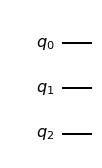

In [15]:
more_qubits= QuantumCircuit(3)
more_qubits.draw(output='mpl')

**Simple!**

```{note}
We observe that the qubits are numbered starting with '0' so that the 3rd qubit has the index '2'. 
```

Now, let's apply some gates to the qubits. 

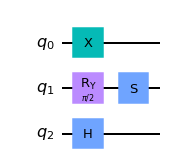

In [16]:
more_qubits.x(0)                      # Apply the x gate to the first qubit 
more_qubits.ry(np.pi/2,1)             # Apply a rotation-y gate to the second qubit
more_qubits.s(1)                      # Apply an S gate also to the second qubit
more_qubits.h(2)                      # Apply a Hadamard gate to the final qubit

more_qubits.draw(output='mpl')

So we've created a quantum circuit using 3 qubits and 4 different gates. 

How about if we want to apply the same gate to all qubits?

## 2. Applying the same gates to all qubits. 

We can do this one of two ways. The manual way is simply as follows: 

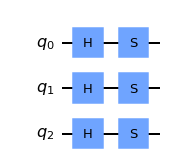

In [17]:
more_qubits2=QuantumCircuit(3)

more_qubits2.h(0)  
more_qubits2.s(0)

more_qubits2.h(1)
more_qubits2.s(1)

more_qubits2.h(2)
more_qubits2.s(2)

more_qubits2.draw(output='mpl')

The quicker way would be to use a loop. See below. 

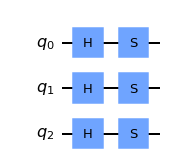

In [13]:
more_qubits2=QuantumCircuit(3)

for i in range(3):                       # For i= 0, 1, 2 
    more_qubits2.h(i)                     # Apply the h gate to the ith qubit
    more_qubits2.s(i)                     # Then apply the s gate to the ith qubit

more_qubits2.draw(output='mpl')

We obtain the same circuit by using the `for` loop. 

## 3. Combining circuits

We now wish to add the circuit the 'more_qubits' circuit after the 'more_qubits2' circuit. To do so, we start off with the circuit we'd like to have first, then apply the `.compose()` method. This is demonstrated below.

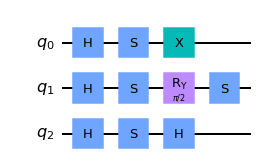

In [25]:
combined_circuit = more_qubits2.compose(more_qubits)  

combined_circuit.draw(output='mpl')

**Easy peasy!** And if we wanted to get fancy, we could also change the order in which the qubits are added...

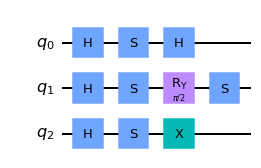

In [26]:
combined_circuit2 = more_qubits2.compose(more_qubits, qubits=[2,1,0])

combined_circuit2.draw(output='mpl')

Above, we have reversed the order of the qubits being added to the left circuit. Instead of '0, 1, 2', we specified '2, 1, 0'. 

Ok, we're ready to explore some interesting things we can do with quantum circuits. 

## 4. Random Sampling of Bitstrings

We know that when we place a qubit in an equal superposition state, the probability of measuring the $|0\rangle$ and $|1\rangle$ states are equal.<br> 

If we were to place multiple qubits into equal superposition and measure them all at once, then we'll obtain a string of '0's and '1's. The interesting thing happends when we run the circuit again and again. Let's see.. 

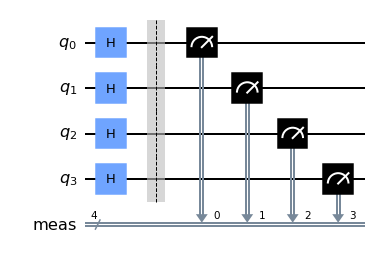

In [38]:
qc= QuantumCircuit(4)

for i in range(4):
    qc.h(i)                      

qc.measure_all()
qc.draw(output='mpl')

We will run the circuit once to see the results. 

In [41]:
simulator = BasicAer.get_backend('qasm_simulator') 

job=execute(qc,simulator,shots=1)

counts= job.result().get_counts()

print(counts)

{'0101': 1}


So we obtained a bitstring of length 4, a measurement for each qubit. **Run the circuit again.** 


We are likely to obtain different results each time we execute the circuit. Let's visualize the results we'll obtain if we ran the circuit a few thousand times. 

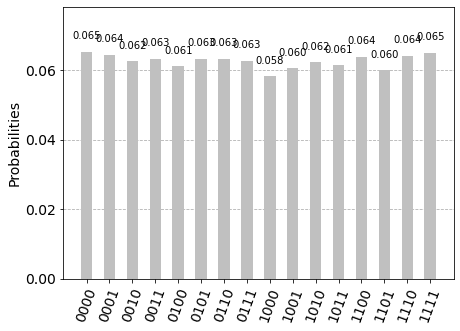

In [54]:
job=execute(qc,simulator,shots=8000)
counts= job.result().get_counts()
plot_histogram(counts, color='silver')

With 8000 shots of the circuit, we see that all possible bitstrings (there are $2^4=16$ possibilities) from '0000' to '1111' are observed with fairly equal probability. 

**Can you think of what this implies for the quantum state of the circuit before the measurement?**

```{toggle}

The collective state of the quantum circuit prior to **measurement collapse** is an equal **superposition** of all 16 possible bitstring states. 

This means that by putting our qubits into equal superposition we can perform calculations on many possibilities all at once! 

```

**That's it for this tutorial!** <br> Tune in for the next tutorial where the fun truly begins...

# **Try Your Own Code**

**We leave you this space to enter and play around with your own quantum programming code**. &nbsp; You may want to restart the kernel. 

In [56]:
import qiskit 
from qiskit import *
from qiskit.visualization import *
import numpy as np 
